In [1]:
# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure matplotlib uses Agg backend
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For our predictor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set style for seaborn plots
sns.set(style='whitegrid')

# Display version info (if needed for debugging)
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [3]:
# Load the dataset from the CSV file
file_path = '/content/top_rated_2000webseries.csv'
df = pd.read_csv(file_path, encoding='utf-8', delimiter=',')

# Display the first few rows to get an initial sense of the data
print(df.head())

# Display the data types
print(df.dtypes)

   id                           title              original_title  \
0   1                    Breaking Bad                Breaking Bad   
1   2      Avatar: The Last Airbender  Avatar: The Last Airbender   
2   3                          Arcane                      Arcane   
3   4  When Life Gives You Tangerines                     폭싹 속았수다   
4   5   Frieren: Beyond Journey's End                    葬送のフリーレン   

                                            overview premiere_date  \
0  Walter White, a New Mexico chemistry teacher, ...    2008-01-20   
1  In a war-torn world of elemental magic, a youn...    2005-02-21   
2  Amid the stark discord of twin cities Piltover...    2021-11-06   
3  In Jeju, a spirited girl and a steadfast boy's...    2025-03-07   
4  Decades after her party defeated the Demon Kin...    2023-09-29   

   popularity                                              genre  \
0    108.7820                                       Drama, Crime   
1     12.5347    Animation, 

In [5]:
# Convert 'premiere_date' to datetime format
# If there are errors in conversion, it is recommended to inspect the problematic rows

df['premiere_date'] = pd.to_datetime(df['premiere_date'], errors='coerce')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Additional cleaning: If necessary, strip extra spaces from string columns
str_cols = ['title', 'original_title', 'overview', 'genre', 'country_origin', 'original_language']
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

# Display summary statistics
print(df.describe(include='all'))

Missing values in each column:
id                    0
title                 0
original_title        0
overview             20
premiere_date         0
popularity            0
genre                 0
country_origin        1
original_language     0
rating                0
votes                 0
dtype: int64
                 id                         title original_title overview  \
count   2000.000000                          2000           2000     2000   
unique          NaN                          1964           1966     1980   
top             NaN  Teenage Mutant Ninja Turtles         キャプテン翼      nan   
freq            NaN                             3              3       20   
mean    1000.500000                           NaN            NaN      NaN   
min        1.000000                           NaN            NaN      NaN   
25%      500.750000                           NaN            NaN      NaN   
50%     1000.500000                           NaN            NaN      NaN   

1. Bibliothèques importées avec succès.

2. Données chargées depuis :
   /content/top_rated_2000webseries.csv

   Taille du dataset : (2000, 11)

Aperçu (premières lignes) :
   id                           title              original_title  \
0   1                    Breaking Bad                Breaking Bad   
1   2      Avatar: The Last Airbender  Avatar: The Last Airbender   
2   3                          Arcane                      Arcane   
3   4  When Life Gives You Tangerines                     폭싹 속았수다   
4   5   Frieren: Beyond Journey's End                    葬送のフリーレン   

                                            overview premiere_date  \
0  Walter White, a New Mexico chemistry teacher, ...    2008-01-20   
1  In a war-torn world of elemental magic, a youn...    2005-02-21   
2  Amid the stark discord of twin cities Piltover...    2021-11-06   
3  In Jeju, a spirited girl and a steadfast boy's...    2025-03-07   
4  Decades after her party defeated the Demon Kin...    2023-

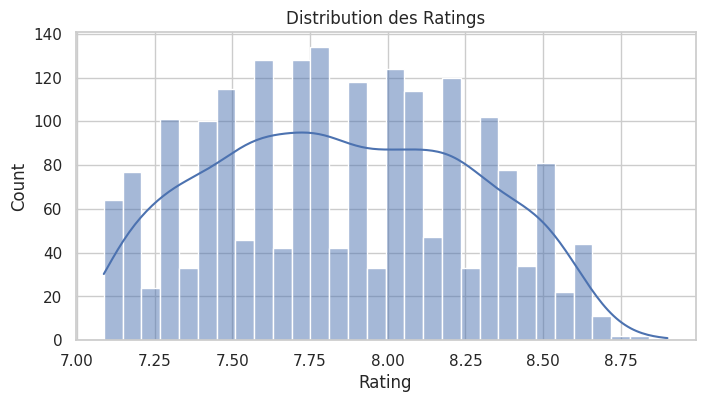

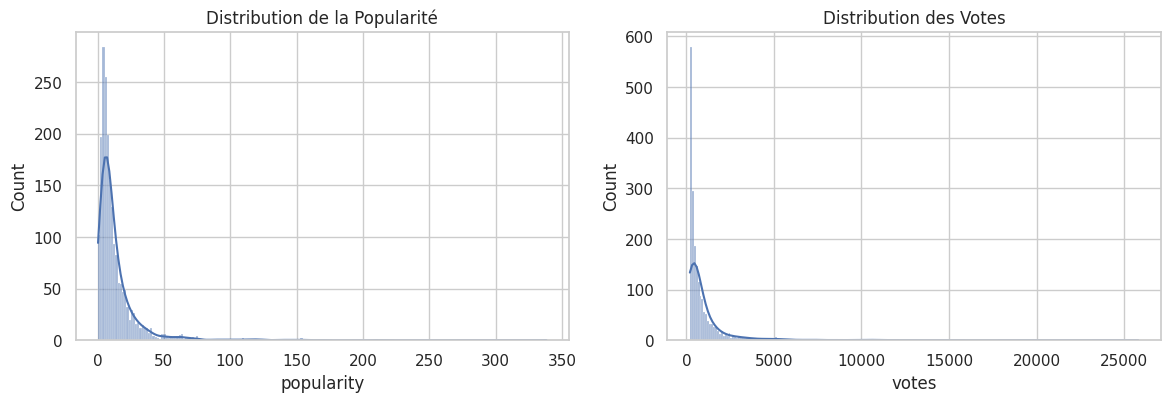

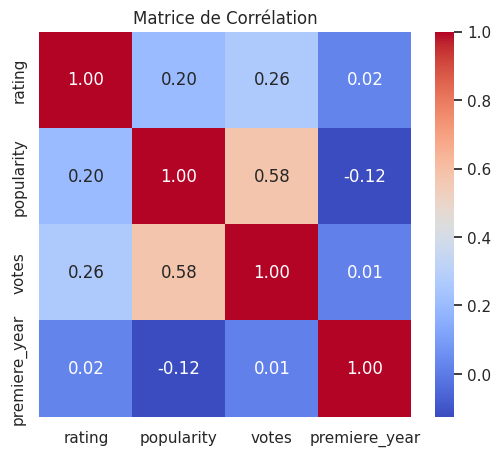

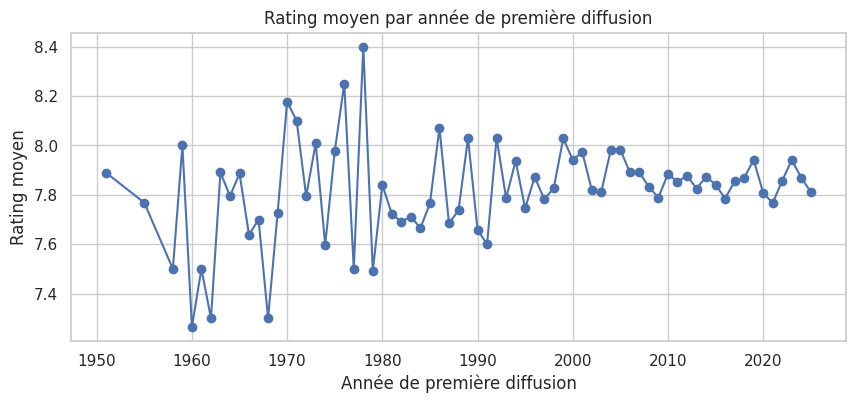


5. Séparation des données (Train/Test)...
   Train: 1600 échantillons, Test: 400 échantillons

6. Entraînement du modèle (Régression Linéaire)...
   Modèle entraîné avec succès.

7. Évaluation du modèle sur le jeu de test...
   R² (coefficient de détermination) : 0.0551
   RMSE : 0.4085

   Coefficients du modèle (feature order: popularity, votes, premiere_year) :
[1.88781851e-03 5.58716389e-05 5.93968726e-04]
   Intercept : 6.577733781099866



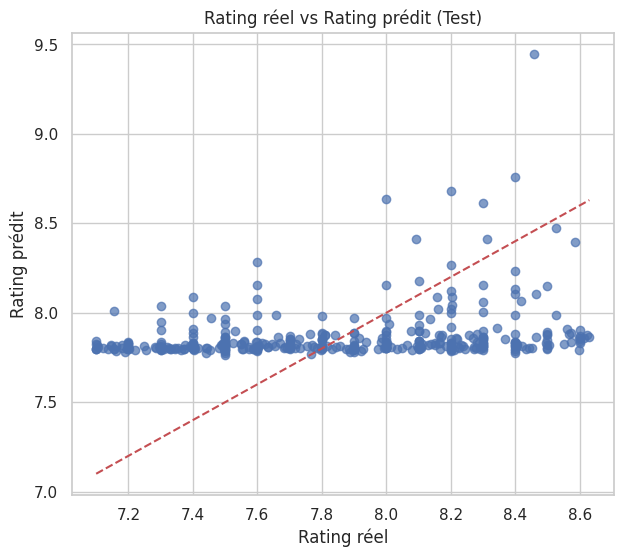

8. Modèle et artefacts sauvegardés dans : /content/rating_linear_model.pkl

--- FIN DU SCRIPT ---


In [7]:
# ==============================================================================
# PROJET DATA SCIENCE : ANALYSE & PRÉDICTION (TOP RATED TV SHOWS 2025)
# Script complet adapté au fichier : /content/top_rated_2000webseries.csv
# ==============================================================================

# 1. IMPORTATION DES BIBLIOTHÈQUES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# 2. CHARGEMENT DES DONNÉES (chemin fourni)
file_path = '/content/top_rated_2000webseries.csv'
df = pd.read_csv(file_path, encoding='utf-8', delimiter=',')

print("2. Données chargées depuis :")
print(f"   {file_path}\n")
print(f"   Taille du dataset : {df.shape}\n")

# Affichage rapide (commenter en exécution batch si nécessaire)
print("Aperçu (premières lignes) :")
print(df.head(), "\n")
print("Types de colonnes :")
print(df.dtypes, "\n")

# 3. PRÉPARATION & CLEANING
print("3. Préparation des données...")

# Normaliser noms colonnes en minuscules pour recherche
col_candidates = [c.lower() for c in df.columns]

def find_col(possible_names):
    for name in possible_names:
        if name in col_candidates:
            return df.columns[col_candidates.index(name)]
    return None

rating_col = find_col(['rating', 'score', 'rate', 'rank'])
popularity_col = find_col(['popularity', 'popularity_score', 'popularityindex', 'pop_score'])
votes_col = find_col(['votes', 'vote_count', 'num_votes', 'votes_count'])
premiere_col = find_col(['premiere_date', 'premiere', 'first_air_date', 'release_date', 'year', 'air_date'])
country_col = find_col(['country', 'countries', 'origin_country'])
title_col = find_col(['title', 'name'])

print(f"   Colonnes identifiées -> rating: {rating_col}, popularity: {popularity_col}, votes: {votes_col}, premiere: {premiere_col}")

# Vérification des colonnes essentielles
required = [rating_col, popularity_col, votes_col, premiere_col]
if any(v is None for v in required):
    missing = [name for name, val in zip(['rating','popularity','votes','premiere_date'], required) if val is None]
    raise ValueError(f"Colonnes essentielles manquantes dans le dataset : {missing}. Vérifie les noms de colonnes dans le CSV.")

# Conversion premiere_date -> datetime et extraction year
df[premiere_col] = pd.to_datetime(df[premiere_col], errors='coerce')
df['premiere_year'] = df[premiere_col].dt.year

# Construire le DataFrame pour modélisation
df_model = df[[rating_col, popularity_col, votes_col, 'premiere_year']].copy()
df_model.columns = ['rating', 'popularity', 'votes', 'premiere_year']

# Inspecter valeurs manquantes
print("   Valeurs manquantes avant nettoyage :")
print(df_model.isnull().sum())

# Supprimer les lignes sans target (rating)
df_model = df_model[~df_model['rating'].isnull()].reset_index(drop=True)

# Imputation des features numériques
imputer = SimpleImputer(strategy='mean')
X_cols = ['popularity', 'votes', 'premiere_year']
X_imputed = imputer.fit_transform(df_model[X_cols])
X_clean = pd.DataFrame(X_imputed, columns=X_cols)

# DataFrame final
df_final = pd.concat([df_model[['rating']].reset_index(drop=True), X_clean], axis=1)
print("\n   Valeurs manquantes après imputation :")
print(df_final.isnull().sum(), "\n")

# 4. ANALYSE EXPLORATOIRE (EDA)
print("4. Analyse Exploratoire (EDA)...\n")

print("   Statistiques descriptives :")
print(df_final.describe().T, "\n")

# Distribution de la target
plt.figure(figsize=(8,4))
sns.histplot(df_final['rating'], kde=True, bins=30)
plt.title("Distribution des Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Histogrammes des features
fig, axes = plt.subplots(1, 2, figsize=(14,4))
sns.histplot(df_final['popularity'], ax=axes[0], kde=True)
axes[0].set_title("Distribution de la Popularité")
sns.histplot(df_final['votes'], ax=axes[1], kde=True)
axes[1].set_title("Distribution des Votes")
plt.show()

# Heatmap corrélation
plt.figure(figsize=(6,5))
corr = df_final.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

# Evolution moyenne des ratings par année (si assez de données)
if df_final['premiere_year'].notnull().any():
    yearly = df_final.groupby('premiere_year')['rating'].mean().dropna()
    if len(yearly) > 1:
        plt.figure(figsize=(10,4))
        yearly.plot(marker='o')
        plt.title("Rating moyen par année de première diffusion")
        plt.xlabel("Année de première diffusion")
        plt.ylabel("Rating moyen")
        plt.grid(True)
        plt.show()

# 5. SÉPARATION DES DONNÉES (Train / Test)
print("\n5. Séparation des données (Train/Test)...")
X = df_final[X_cols].values
y = df_final['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"   Train: {X_train.shape[0]} échantillons, Test: {X_test.shape[0]} échantillons\n")

# 6. MODÈLE : RÉGRESSION LINÉAIRE (comme point de départ pédagogique)
print("6. Entraînement du modèle (Régression Linéaire)...")
lr = LinearRegression()
lr.fit(X_train, y_train)
print("   Modèle entraîné avec succès.\n")

# 7. ÉVALUATION
print("7. Évaluation du modèle sur le jeu de test...")
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"   R² (coefficient de détermination) : {r2:.4f}")
print(f"   RMSE : {rmse:.4f}\n")

print("   Coefficients du modèle (feature order: popularity, votes, premiere_year) :")
print(lr.coef_)
print(f"   Intercept : {lr.intercept_}\n")

# Visualisation : prédictions vs réalité
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # droite y=x
plt.xlabel("Rating réel")
plt.ylabel("Rating prédit")
plt.title("Rating réel vs Rating prédit (Test)")
plt.grid(True)
plt.show()

# 8. Sauvegarde du modèle et de l'imputer (utile pour deployment / demo)
model_path = '/content/rating_linear_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump({'model': lr, 'imputer': imputer, 'features': X_cols}, f)
print(f"8. Modèle et artefacts sauvegardés dans : {model_path}\n")

print("--- FIN DU SCRIPT ---")
